# Exploratory Data Analysis (EDA) on a Home Loan dataset

This project conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment. 
Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes.

## Phase 1: Data Collection and Preparation

### Import relevant Libraries


In [117]:
# importing library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat 

# set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)



### Load the Home Loan datasets into a Pandas DataFrame

In [118]:
# loading data
loan_train_path= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"  #path to the loan dataset

# path to the test data
loan_test_path = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

# load the train data
loan_train = pd.read_csv(loan_train_path)
train = loan_train
# load the test data
loan_test = pd.read_csv(loan_test_path)
test = loan_test

# Initial Data Inspection:

## Train data

In [119]:
print(f" Heal {train.head()}")
print("******************************************************************")
print (f" Tail {train.tail()}")



 Heal     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [120]:
print(f" Snapshot {train.info()}")
print("******************************************************************")
print(f"Shape {train.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
 Snapshot None
******************************************************************
Shape (614, 13)


#### Test Data

In [121]:
print(f" Heal {test.head()}")
print("******************************************************************")
print (f" Tail {test.tail()}")


 Heal     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             Na

In [122]:
print(f" Snapshot {test.info()}")
print("******************************************************************")
print(f"Shape {test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
 Snapshot None
******************************************************************
Shape (367, 12)


### Descriptive Statistics

In [123]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [124]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Data Cleaning and Preparation : Missing values, Duplicates and Inconsistencies

In [125]:
# Handling Missing Values
print(f" Missing Values for Train Data: {train.isnull().sum()}")
print("******************************************************************")
print(f" Missing Values for Test Data: {test.isnull().sum()}")


 Missing Values for Train Data: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
******************************************************************
 Missing Values for Test Data: Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


<Axes: >

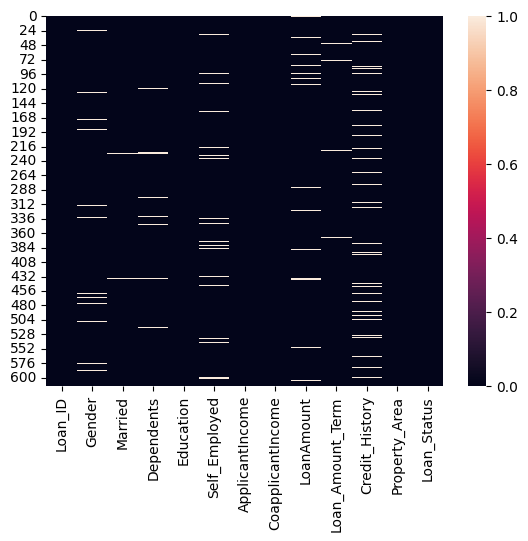

In [126]:
## Visualizing with heatmaps 
# Load Train data
sns.heatmap(train.isnull())

<Axes: >

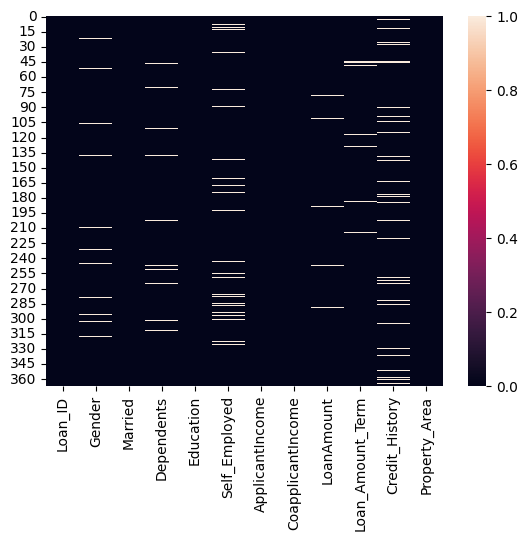

In [127]:
# Load Test data
sns.heatmap(test.isnull())

## Handling Missing Values (Most columns have few missing values)
* Drop rows with more than 3 missing values
* For categorical values such as Gender, Marrried and Self employed, i will fill with the Mode 
* For categorical values such as Dependents and Credit History, i will create another category called "Unknown"
*  For numerical data such as LoanAmount, i will fill with the Median, while for Loan_Amount_Term
i will fill with mode since most common term is usually 360 months

In [128]:
# Dropping rows with more than 3 missing values
train = train[train.isnull().sum(axis=1) <= 3]
test = test[test.isnull().sum(axis=1) <= 3]

In [129]:
import numpy as np
import statistics 

In [130]:
# filling missing valus in Gender, Marrried, Self employed and LOan_Amount_Term with the Mode
print(f"Mode for Gender:  {statistics.mode(train['Gender'])}")      

print(f" Mode for Married: {statistics.mode(train['Married'])}")

print(f" Mode for Self Employed: {statistics.mode(train['Self_Employed'])}")

# Test 
print(f"Mode for Gender:  {statistics.mode(test['Gender'])}")      

print(f" Mode for Married: {statistics.mode(test['Married'])}")

print(f" Mode for Self Employed: {statistics.mode(test['Self_Employed'])}")




Mode for Gender:  Male
 Mode for Married: Yes
 Mode for Self Employed: No
Mode for Gender:  Male
 Mode for Married: Yes
 Mode for Self Employed: No


In [131]:
for col in ['Gender', 'Married', 'Dependents' , 'Self_Employed', 'Loan_Amount_Term' ]:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

In [132]:
# Creating "Unknown" category for missing values in Dependents and Credit History

for col in ['Credit_History']:
    train[col] = train[col].fillna('Unknown')
    test[col] = test[col].fillna('Unknown')
 


In [133]:
#  Replacing missing values in LoanAmount  Median, and in Loan_Amount_Term with mode
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median)
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median)
 

<Axes: >

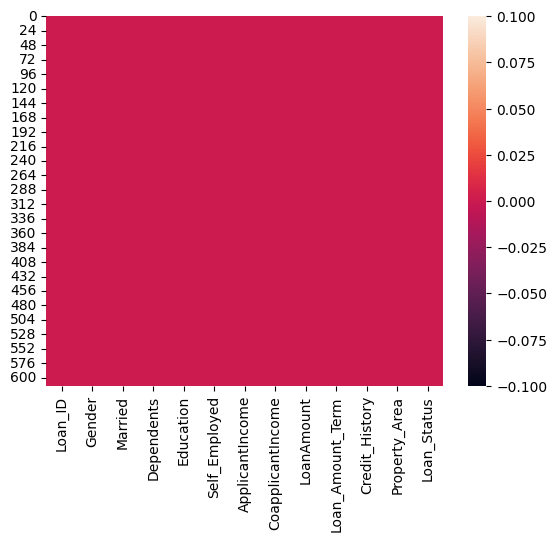

In [134]:
sns.heatmap(train.isnull())

<Axes: >

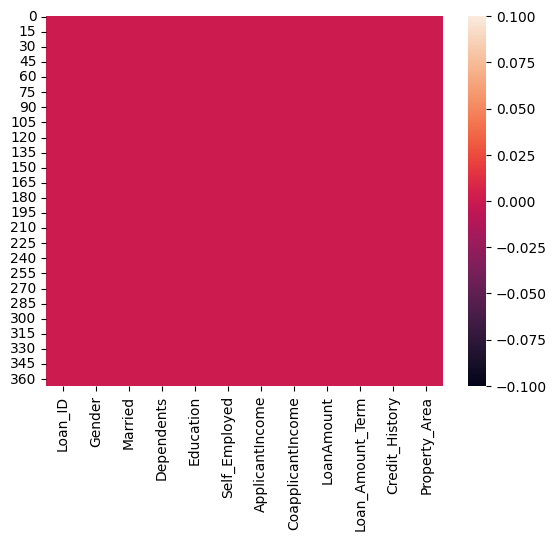

In [135]:
sns.heatmap(test.isnull())

### Handling duplicates 

In [136]:
print(f" Duplicate Values for Train Data: {train.duplicated().sum()}")
print("******************************************************************")
print(f" Duplicates Values for Test Data: {test.duplicated().sum()}")


 Duplicate Values for Train Data: 0
******************************************************************
 Duplicates Values for Test Data: 0


### Handling Incosistencies

### Converting Dependents from string to integer

In [141]:
# Viewing the unique values in Dependents

print(f" Unique values in Loan Train data: {train['Dependents'].unique()}")
print(f" Unique values in Loan Test data: {test['Dependents'].unique()}")


 Unique values in Loan Train data: ['0' '1' '2' '3+']
 Unique values in Loan Test data: ['0' '1' '2' '3+']


In [167]:
#Changing the value '+3' to proper integer; replacing with number '

train['Dependents'] = train['Dependents'].replace("3+" , "3")
test['Dependents'] = test['Dependents'].replace("3+" , 3)



In [168]:
print(f" Unique values in Loan Train data: {train['Dependents'].unique()}")
print(f" Unique values in Loan Test data: {test['Dependents'].unique()}")


 Unique values in Loan Train data: ['0' '1' '2' '3']
 Unique values in Loan Test data: ['0' '1' '2' 3]


In [169]:
# Converting Dependets to Integer

train['Dependents'] = train['Dependents'].astype(int)
test['Dependents'] = test['Dependents'].astype(int)


test['Dependents'].dtype


dtype('int64')

In [113]:
# Outlier Detection
sns.boxplot(x=df['LoanAmount'])
plt.show()

# Descriptive Stats
print(df['ApplicantIncome'].describe())
print(df['LoanAmount'].describe())
print(df['Education'].value_counts())
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

# Univariate Analysis
sns.histplot(df['LoanAmount'], kde=True)
plt.show()

sns.countplot(x='Education', data=df)
plt.show()

# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

print(pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index'))

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualization
df['ApplicantIncome'].hist(bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.show()

# Insights
print("Credit history has a strong correlation with loan approval.")
print("Higher income does not always guarantee loan approval.")
print("Property area and education level show interesting trends.")

# Conclusion
print("Next step: build a classification model to predict loan approval.")


NameError: name 'df' is not defined